# Noise Amplification 

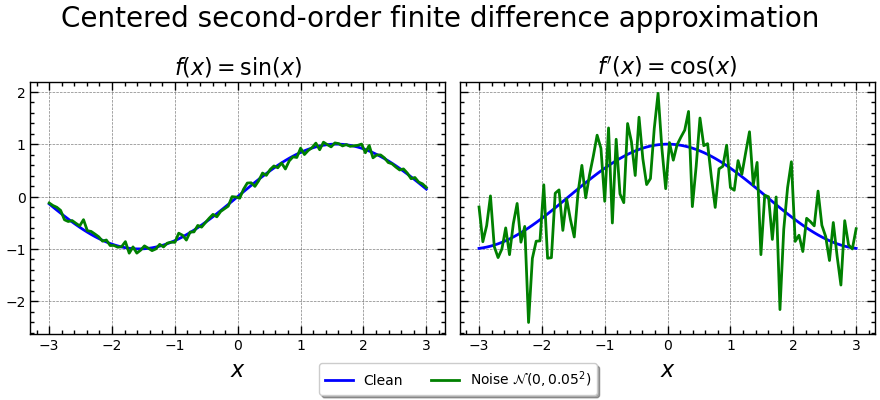

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
np.random.seed(42)
plt.style.use(["science", "notebook", "grid"])

x = np.linspace(-3, 3, 100)
y_clean = lambda x: np.sin(x)
y_noise = lambda x: np.sin(x) + np.random.normal(0, 0.05, x.shape) # Gaus. noise with std=0.05

# centered second-order finite difference (used internally in ps.FiniteDifference)
h = x[1] - x[0] 
y_clean_derivative = (y_clean(x + h) - y_clean(x - h)) / (2 * h) # cos(x)
y_noise_derivative = (y_noise(x + h) - y_noise(x - h)) / (2 * h)

# plot
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True)
axes[0].plot(x, y_clean(x), label="Clean", c = "blue")
axes[0].plot(x, y_noise(x), label="Noise $\mathcal{N}(0,0.05^2)$", c = "green")
axes[0].set_xlabel("$x$")
axes[0].xaxis.set_tick_params(labelsize=10)
axes[0].yaxis.set_tick_params(labelsize=10)
axes[0].set_title("$f(x)=\sin(x)$")
axes[1].plot(x, y_clean_derivative, label="Clean", c = "blue")
axes[1].plot(x, y_noise_derivative, label="Noise  $\mathcal{N}(0,0.05^2)$", c = "green")
axes[1].set_xlabel("$x$")
axes[1].xaxis.set_tick_params(labelsize=10)
axes[1].yaxis.set_tick_params(labelsize=10)
axes[1].set_title("$f'(x)=\cos(x)$")
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.52, 0.1), shadow=True, ncol=2, prop={'size': 10})
fig.suptitle("Centered second-order finite difference approximation", fontsize = 20 )
plt.tight_layout()
plt.show()

# Savitzky-Golay Filter

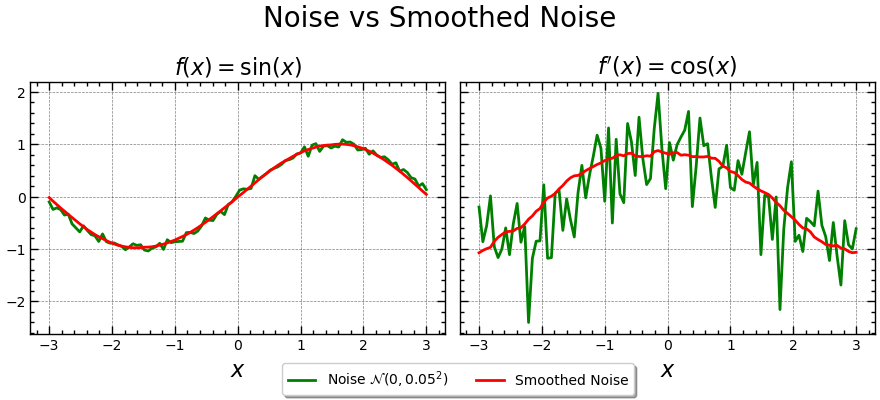

In [4]:
from scipy import signal

y_noise_smoothed_func = lambda x_in: signal.savgol_filter(y_noise(x_in), window_length=51, polyorder=3, mode = "wrap")
y_noise_smoothed = y_noise_smoothed_func(x)
y_noise_smoothed_derivative = (y_noise_smoothed_func(x + h) - y_noise_smoothed_func(x - h)) / (2 * h)

# plot
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True)
axes[0].plot(x, y_noise(x), label="Noise $\mathcal{N}(0,0.05^2)$", c = "green")
axes[0].plot(x, y_noise_smoothed, label="Smoothed Noise", c = "red")
axes[0].set_xlabel("$x$")
axes[0].xaxis.set_tick_params(labelsize=10)
axes[0].yaxis.set_tick_params(labelsize=10)
axes[0].set_title("$f(x)=\sin(x)$")
axes[1].plot(x, y_noise_derivative, label="Noise  $\mathcal{N}(0,0.05^2)$", c = "green")
axes[1].plot(x, y_noise_smoothed_derivative, label="Smoothed Noise", c = "red")
# axes[1].plot(x, np.cos(x))
axes[1].set_xlabel("$x$")
axes[1].xaxis.set_tick_params(labelsize=10)
axes[1].yaxis.set_tick_params(labelsize=10)
axes[1].set_title("$f'(x)=\cos(x)$")
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.52, 0.1), shadow=True, ncol=2, prop={'size': 10})
fig.suptitle("Noise vs Smoothed Noise", fontsize = 20 )
plt.tight_layout()
plt.show()